In [1]:
from UTILITY_quickstart import *

In [2]:
#Start from golden lattice
tao = initializeTao(
    loadDefaultLatticeTF = False
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Base Tao lattice
WARNING! No beam file is specified!
Number of macro particles defined by input file


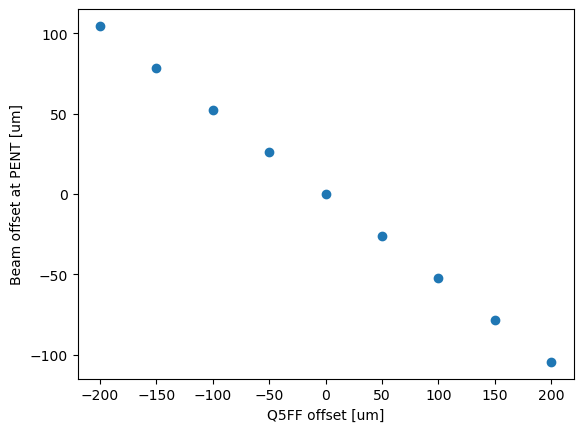

In [3]:
results = {"quadOffset": [], "beamOffset": []}
step = 50e-6
for quadOffset in np.arange(-200e-6, 200e-6 + step, step):
    setXOffset(tao, "Q5FF", quadOffset)
    beamOffset = getMatrix(tao,"MFFF","PENT",order=0)[0]

    
    results["quadOffset"].append(quadOffset)
    results["beamOffset"].append(beamOffset)
    #print([L2PhaseSet, P["mean_energy"]])

plt.scatter(
    1e6 * np.array(results["quadOffset"]), 
    1e6 * np.array(results["beamOffset"])
)

# Adding title and labels
plt.xlabel('Q5FF offset [um]')
plt.ylabel('Beam offset at PENT [um]')

# Display the plot
plt.show()

In [4]:
# #Show all cases

# quadNameList = ["Q5FF", "Q4FF", "Q3FF", "Q2FF", "Q1FF", "Q0FF"]


# for quad in quadNameList: 
#     #Start from golden lattice
#     tao = initializeTao(
#         loadDefaultLatticeTF = False
#     )
    
    
#     results = {"quadOffset": [], "beamOffset": []}
#     step = 50e-6
#     for quadOffset in np.arange(0, 200e-6 + step, step):
#         setXOffset(tao, quad, quadOffset)
#         beamOffset = np.sqrt( getMatrix(tao,"MFFF","PENT",order=0)[0] ** 2 + getMatrix(tao,"MFFF","PENT",order=0)[2] ** 2 ) 
    
        
#         results["quadOffset"].append(quadOffset)
#         results["beamOffset"].append(beamOffset)
#         #print([L2PhaseSet, P["mean_energy"]])

    
#     # plt.scatter(
#     #     1e6 * np.array(results["quadOffset"]), 
#     #     1e6 * np.array(results["beamOffset"])
#     # )
    
#     # # Adding title and labels
#     # plt.xlabel(f'{quad} offset [um]')
#     # plt.ylabel('Beam offset at PENT [um]')

#     print(f"""{quad} : {results['beamOffset'][-1] / results['quadOffset'][-1]}""")
    
#     # Display the plot
#     plt.show()

# Automating

In [5]:
#Load a default configuration
importedDefaultSettings = loadConfig("setLattice_configs/defaults.yml")

#Initialize tao object
tao = initializeTao(
    #inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    #numMacroParticles = 1e4,
    #csrTF = False
)

#Set lattice to the loaded config
setLattice(tao, **importedDefaultSettings)

tao.twiss_at_s(ele = "PENT", s_offset = 0.0)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
WARNING! No beam file is specified!
Number of macro particles defined by input file


{'beta_a': 0.50649204966748,
 'alpha_a': 0.0466683356262582,
 'gamma_a': 1.9786646882376,
 'phi_a': 73.0782192378143,
 'eta_a': -5.53984755575948e-06,
 'etap_a': -1.05998552673305e-05,
 'beta_b': 0.500627846338041,
 'alpha_b': -0.120964597934503,
 'gamma_b': 2.02671993053367,
 'phi_b': 60.5521347355512,
 'eta_b': -2.11809896530596e-18,
 'etap_b': -2.52217362743306e-18,
 'c_mat11': 1.24354101578855e-16,
 'c_mat12': -2.15263057112982e-17,
 'c_mat21': -3.33737707176956e-17,
 'c_mat22': 4.78887427948486e-18,
 'gamma_c': 1.0}

In [6]:
allMagnetConfigs = []

for offset in [-0.5, 0, 0.5]:
    allMagnetConfigs.append(
        finalFocusSolver(tao, 
                     ele = "PENT",
                     s_offset = offset,
                     targetBetaX = 0.5,
                     targetAlphaX = 0.0,
                     targetBetaY = 0.5,
                     targetAlphaY = 0,
                     verbose = True
                     )
    )

allMagnetConfigs = { "upstream" : allMagnetConfigs[0], "PENT" : allMagnetConfigs[1], "downstream" : allMagnetConfigs[2] }

Optimization Results:
Optimal Parameters: [ -67.76984659  -79.73112448   98.00236824  132.6233353  -244.0041839
  130.61315646]
Objective Function Value at Optimal Parameters: 0.0001559033725029663
Number of Iterations: 583
Converged: True
Optimization Results:
Optimal Parameters: [ -72.10007249  -81.35360454   99.27426586  126.46451734 -234.61673705
  126.33640932]
Objective Function Value at Optimal Parameters: 4.5775805850083643e-07
Number of Iterations: 627
Converged: True
Optimization Results:
Optimal Parameters: [ -75.89019358  -83.02458665   99.54713792  121.8312029  -226.6814921
  121.6982502 ]
Objective Function Value at Optimal Parameters: 0.0001352163349461823
Number of Iterations: 759
Converged: True


## Monte Carlo

In [7]:
# quadNameList = ["Q5FF", "Q4FF", "Q3FF", "Q2FF", "Q1FF", "Q0FF"]
# #quadErrorSigma = 10e-6 


# results = pd.DataFrame()


# #for quadErrorSigma in [1e-6, 2e-6, 5e-6, 10e-6, 20e-6, 50e-6, 100e-6, 200e-6, 500e-6]:
# for quadErrorSigma in [50e-6]:
#     for iteration in np.arange(20):

#         #Prevent recalculation until changes are made
#         tao.cmd("set global lattice_calc_on = F")
        
#         for quad in quadNameList:
#             setXOffset(tao, quad, quadErrorSigma * np.random.normal())
#             setYOffset(tao, quad, quadErrorSigma * np.random.normal())
            
#         #Reenable lattice calculations
#         tao.cmd("set global lattice_calc_on = T")

#         for magnetConfigKey in allMagnetConfigs.keys():
#             magnetConfig = allMagnetConfigs[magnetConfigKey]
            
#             setLattice(tao, **(importedDefaultSettings | magnetConfig ))
            
#             newLine = { "quadErrorSigma" : quadErrorSigma, "iteration": iteration, "magnetConfigKey" : magnetConfigKey } 

#             for evalEle in ["M5FF", "IPOTR1", "PENT", "IPOTR2", "M0EX"]:

#                 newLine[f"{evalEle}_xCenter"] = getMatrix(tao, "MFFF", evalEle, order=0)[0]
#                 newLine[f"{evalEle}_yCenter"] = getMatrix(tao, "MFFF", evalEle, order=0)[2]
        
        
#             # Convert newLine to a DataFrame before concatenating
#             newLine_df = pd.DataFrame([newLine])
#             results = pd.concat([results, newLine_df], ignore_index=True)

# # Save results to JSON
# results.to_json('results.json', orient='records')

## Single magnet sensitivities

In [8]:
quadNameList = ["Q5FF", "Q4FF", "Q3FF", "Q2FF", "Q1FF", "Q0FF"]
#quadErrorSigma = 10e-6 


results = pd.DataFrame()

#     #Start from golden lattice
tao = initializeTao(
    loadDefaultLatticeTF = False
)

#for quadErrorSigma in [1e-6, 2e-6, 5e-6, 10e-6, 20e-6, 50e-6, 100e-6, 200e-6, 500e-6]:
for quad in quadNameList:
    for axis in ["X", "Y"]: 
        
        #Prevent recalculation until changes are made
        tao.cmd("set global lattice_calc_on = F")
        
        # for quad in quadNameList:
        #     setXOffset(tao, quad, quadErrorSigma * np.random.normal())
        #     setYOffset(tao, quad, quadErrorSigma * np.random.normal())


        #Clean start each loop (remember that setLattice() doesn't check for these offsets!!)
        for quadInnerLoop in quadNameList:
            setXOffset(tao, quadInnerLoop, 0)
            setYOffset(tao, quadInnerLoop, 0)

        tao.cmd(f"set ele {quad} {axis}_OFFSET = {50e-6}")
        
        #Reenable lattice calculations
        tao.cmd("set global lattice_calc_on = T")



        
        for magnetConfigKey in allMagnetConfigs.keys():
            magnetConfig = allMagnetConfigs[magnetConfigKey]
            
            setLattice(tao, **(importedDefaultSettings | magnetConfig ))
            
            newLine = { "quad" : quad, "axis": axis, "magnetConfigKey" : magnetConfigKey } 

            #for evalEle in ["M5FF", "IPOTR1", "PENT", "IPOTR2", "M0EX"]:
            for evalEle in ["PENT"]:

                newLine[f"{evalEle}_xCenter"] = tao.ele_orbit("PENT")['x']
                newLine[f"{evalEle}_yCenter"] = tao.ele_orbit("PENT")['y']
        
        
            # Convert newLine to a DataFrame before concatenating
            newLine_df = pd.DataFrame([newLine])
            results = pd.concat([results, newLine_df], ignore_index=True)

# Save results to JSON
results.to_json('results.json', orient='records')

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Base Tao lattice
WARNING! No beam file is specified!
Number of macro particles defined by input file


## Printing R-matrices

In [9]:
#     #Start from golden lattice
tao = initializeTao(
    loadDefaultLatticeTF = False
)

print("\n\n\n")
for magnetConfigKey in allMagnetConfigs.keys():
    magnetConfig = allMagnetConfigs[magnetConfigKey]

    print(f"Waist location is {magnetConfigKey}")
    setLattice(tao, **(importedDefaultSettings | magnetConfig ))

    for quad in quadNameList:
        print(quad)
        rawMat6 = tao.ele_mat6(quad)
        df = pd.DataFrame.from_dict(rawMat6, orient='index', columns=['1', '2', '3', '4', '5', '6'])
        displayMatrix(df)

    print("\n\n\n")

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Base Tao lattice
WARNING! No beam file is specified!
Number of macro particles defined by input file




Waist location is upstream
Q5FF


1.047187,0.468127,0.000000,0.000000,0.000000,0.000000
0.206355,1.047187,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,0.953544,0.453740,0.000000,0.000000
0.000000,0.000000,-0.200013,0.953544,0.000000,-0.000000
0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q4FF


1.086578,0.734695,0.000000,0.000000,0.000000,0.000000
0.245887,1.086578,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,0.915851,0.694052,0.000000,-0.000000
0.000000,0.000000,-0.232285,0.915851,0.000000,0.000000
0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q3FF


0.896905,0.689483,0.000000,0.000000,0.000000,0.000000
-0.283636,0.896905,0.000000,0.000000,0.000000,-0.000000
0.000000,0.000000,1.106765,0.739441,0.000000,-0.000000
0.000000,0.000000,0.304187,1.106765,0.000000,-0.000000
-0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q2FF


0.861347,0.680876,0.000000,0.000000,0.000000,-0.000000
-0.379043,0.861347,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,1.145373,0.748484,0.000000,-0.000000
0.000000,0.000000,0.416681,1.145373,0.000000,-0.000000
0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q1FF


1.272793,0.778033,0.000000,0.000000,0.000000,-0.000000
0.796886,1.272793,0.000000,0.000000,0.000000,-0.000000
0.000000,0.000000,0.749956,0.653616,0.000000,-0.000000
0.000000,0.000000,-0.669455,0.749956,0.000000,0.000000
-0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q0FF


0.863399,0.681374,0.000000,0.000000,0.000000,-0.000000
-0.373571,0.863399,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,1.143118,0.747957,0.000000,0.000000
0.000000,0.000000,0.410076,1.143118,0.000000,0.000000
0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000






Waist location is PENT
Q5FF


1.050235,0.468592,0.000000,0.000000,0.000000,0.000000
0.219792,1.050235,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,0.950593,0.453284,0.000000,-0.000000
0.000000,0.000000,-0.212612,0.950593,0.000000,-0.000000
0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q4FF


1.088379,0.735119,0.000000,0.000000,0.000000,0.000000
0.251075,1.088379,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,0.914150,0.693643,0.000000,-0.000000
0.000000,0.000000,-0.236909,0.914150,0.000000,0.000000
0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q3FF


0.895574,0.689162,0.000000,0.000000,0.000000,0.000000
-0.287228,0.895574,0.000000,0.000000,0.000000,-0.000000
0.000000,0.000000,1.108192,0.739776,0.000000,-0.000000
0.000000,0.000000,0.308323,1.108192,0.000000,-0.000000
-0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q2FF


0.867620,0.682397,0.000000,0.000000,0.000000,-0.000000
-0.362305,0.867620,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,1.138493,0.746876,0.000000,-0.000000
0.000000,0.000000,0.396539,1.138493,0.000000,-0.000000
0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q1FF


1.261906,0.775525,0.000000,0.000000,0.000000,-0.000000
0.763878,1.261906,0.000000,0.000000,0.000000,-0.000000
0.000000,0.000000,0.759133,0.655880,0.000000,-0.000000
0.000000,0.000000,-0.646029,0.759133,0.000000,0.000000
-0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q0FF


0.867751,0.682429,0.000000,0.000000,0.000000,-0.000000
-0.361955,0.867751,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,1.138349,0.746842,0.000000,0.000000
0.000000,0.000000,0.396119,1.138349,0.000000,0.000000
0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000






Waist location is downstream
Q5FF


1.052898,0.468999,0.000000,0.000000,0.000000,0.000000
0.231547,1.052898,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,0.948018,0.452886,0.000000,-0.000000
0.000000,0.000000,-0.223592,0.948018,0.000000,-0.000000
0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q4FF


1.090222,0.735552,0.000000,0.000000,0.000000,0.000000
0.256383,1.090222,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,0.912413,0.693224,0.000000,-0.000000
0.000000,0.000000,-0.241629,0.912413,0.000000,0.000000
0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q3FF


0.895292,0.689094,0.000000,0.000000,0.000000,0.000000
-0.287989,0.895292,0.000000,0.000000,0.000000,-0.000000
0.000000,0.000000,1.108495,0.739847,0.000000,-0.000000
0.000000,0.000000,0.309200,1.108495,0.000000,-0.000000
-0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q2FF


0.872364,0.683547,0.000000,0.000000,0.000000,-0.000000
-0.349620,0.872364,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,1.133309,0.745663,0.000000,-0.000000
0.000000,0.000000,0.381391,1.133309,0.000000,-0.000000
0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q1FF


1.252692,0.773401,0.000000,0.000000,0.000000,-0.000000
0.736020,1.252692,0.000000,0.000000,0.000000,-0.000000
0.000000,0.000000,0.766947,0.657804,0.000000,-0.000000
0.000000,0.000000,-0.626010,0.766947,0.000000,0.000000
-0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Q0FF


0.872500,0.683580,0.000000,0.000000,0.000000,-0.000000
-0.349255,0.872500,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,1.133160,0.745628,0.000000,0.000000
0.000000,0.000000,0.380957,1.133160,0.000000,0.000000
0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## Sensitivity to incoming beam errors

In [10]:
#Load a default configuration
importedDefaultSettings = loadConfig("setLattice_configs/defaults.yml")

#Initialize tao object
tao = initializeTao(
    #inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    #numMacroParticles = 1e4,
    #csrTF = False
)

#Set lattice to the loaded config
setLattice(tao, **importedDefaultSettings)

tao.twiss_at_s(ele = "PENT", s_offset = 0.0)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
WARNING! No beam file is specified!
Number of macro particles defined by input file


{'beta_a': 0.50649204966748,
 'alpha_a': 0.0466683356262582,
 'gamma_a': 1.9786646882376,
 'phi_a': 73.0782192378143,
 'eta_a': -5.53984755575948e-06,
 'etap_a': -1.05998552673305e-05,
 'beta_b': 0.500627846338041,
 'alpha_b': -0.120964597934503,
 'gamma_b': 2.02671993053367,
 'phi_b': 60.5521347355512,
 'eta_b': -2.11809896530596e-18,
 'etap_b': -2.52217362743306e-18,
 'c_mat11': 1.24354101578855e-16,
 'c_mat12': -2.15263057112982e-17,
 'c_mat21': -3.33737707176956e-17,
 'c_mat22': 4.78887427948486e-18,
 'gamma_c': 1.0}

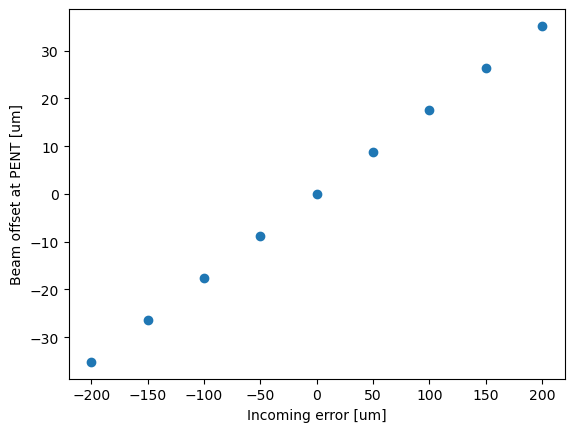

In [11]:
results = {"incomingError": [], "beamOffset": []}
step = 50e-6
for incomingError in np.arange(-200e-6, 200e-6 + step, step):
    #setXOffset(tao, "Q5FF", quadOffset)

    tao.cmd(f"set ele patch_sector20 x_offset = {incomingError}")
    beamOffset = tao.ele_orbit("PENT")['x']
    
    results["incomingError"].append(incomingError)
    results["beamOffset"].append(beamOffset)
    #print([L2PhaseSet, P["mean_energy"]])

plt.scatter(
    1e6 * np.array(results["incomingError"]), 
    1e6 * np.array(results["beamOffset"])
)

# Adding title and labels
plt.xlabel('Incoming error [um]')
plt.ylabel('Beam offset at PENT [um]')

# Display the plot
plt.show()

In [21]:
allMagnetConfigs = []

for offset in [-0.5, 0, 0.5]:
    allMagnetConfigs.append(
        finalFocusSolver(tao, 
                     ele = "PENT",
                     s_offset = offset,
                     targetBetaX = 0.5,
                     targetAlphaX = 0.0,
                     targetBetaY = 0.5,
                     targetAlphaY = 0,
                     verbose = True
                     )
    )

allMagnetConfigs = { "upstream" : allMagnetConfigs[0], "PENT" : allMagnetConfigs[1], "downstream" : allMagnetConfigs[2] }

Optimization Results:
Optimal Parameters: [ -67.76985175  -79.7311106    98.00236006  132.62333463 -244.00418159
  130.61315049]
Objective Function Value at Optimal Parameters: 0.00015590334323612473
Number of Iterations: 710
Converged: True
Optimization Results:
Optimal Parameters: [ -72.10008027  -81.35361869   99.27429833  126.46448734 -234.61674012
  126.33646397]
Objective Function Value at Optimal Parameters: 4.577586581124526e-07
Number of Iterations: 686
Converged: True
Optimization Results:
Optimal Parameters: [ -75.89008909  -83.0248896    99.54732097  121.83115775 -226.68150937
  121.69834842]
Objective Function Value at Optimal Parameters: 0.0001352163591527429
Number of Iterations: 730
Converged: True


Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
WARNING! No beam file is specified!
Number of macro particles defined by input file


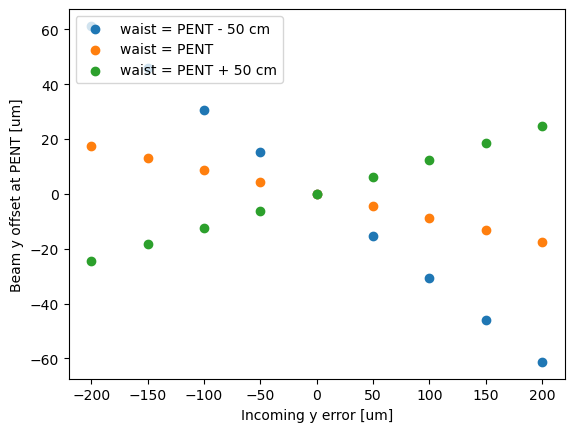

In [28]:
#Initialize tao object
tao = initializeTao(
    #inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    #numMacroParticles = 1e4,
    #csrTF = False
)

#Set lattice to the loaded config
setLattice(tao, **importedDefaultSettings)


results = {"incomingError": [], "beamOffsetUpstream": [], "beamOffsetPENT": [], "beamOffsetDownstream": []}
axis = "y"

step = 50e-6
for incomingError in np.arange(-200e-6, 200e-6 + step, step):
    #setXOffset(tao, "Q5FF", quadOffset)

    tao.cmd(f"set ele patch_sector20 {axis}_offset = {incomingError}")

    setLattice(tao, **(importedDefaultSettings | allMagnetConfigs["upstream"] ))
    beamOffsetUpstream = tao.ele_orbit("PENT")[axis]

    setLattice(tao, **(importedDefaultSettings | allMagnetConfigs["PENT"] ))
    beamOffsetPENT = tao.ele_orbit("PENT")[axis]
    
    setLattice(tao, **(importedDefaultSettings | allMagnetConfigs["downstream"] ))
    beamOffsetDownstream = tao.ele_orbit("PENT")[axis]
    
    results["incomingError"].append(incomingError)
    results["beamOffsetUpstream"].append(beamOffsetUpstream)
    results["beamOffsetPENT"].append(beamOffsetPENT)
    results["beamOffsetDownstream"].append(beamOffsetDownstream)
    #print([L2PhaseSet, P["mean_energy"]])

plt.scatter(
    1e6 * np.array(results["incomingError"]), 
    1e6 * np.array(results["beamOffsetUpstream"]),
    label = "waist = PENT - 50 cm"
)

plt.scatter(
    1e6 * np.array(results["incomingError"]), 
    1e6 * np.array(results["beamOffsetPENT"]),
    label = "waist = PENT"
)

plt.scatter(
    1e6 * np.array(results["incomingError"]), 
    1e6 * np.array(results["beamOffsetDownstream"]),
    label = "waist = PENT + 50 cm"
)

# Adding title and labels
plt.xlabel(f'Incoming {axis} error [um]')
plt.ylabel(f'Beam {axis} offset at PENT [um]')

plt.legend(loc="upper left")

# Display the plot
plt.show()

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
WARNING! No beam file is specified!
Number of macro particles defined by input file


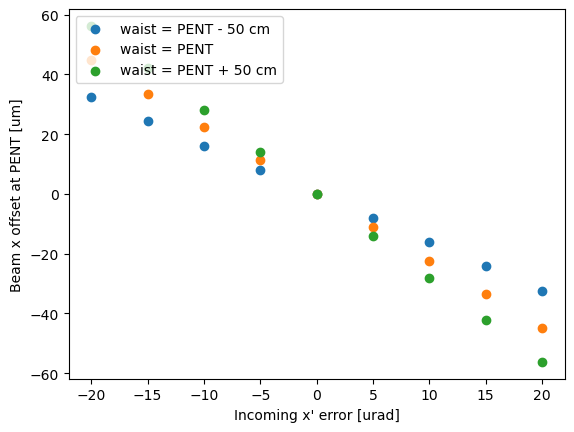

In [32]:
#Initialize tao object
tao = initializeTao(
    #inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    #numMacroParticles = 1e4,
    #csrTF = False
)

#Set lattice to the loaded config
setLattice(tao, **importedDefaultSettings)


results = {"incomingError": [], "beamOffsetUpstream": [], "beamOffsetPENT": [], "beamOffsetDownstream": []}
axis = "x"

step = 5e-6
for incomingError in np.arange(-20e-6, 20e-6 + step, step):
    #setXOffset(tao, "Q5FF", quadOffset)

    tao.cmd(f"set ele patch_sector20 {axis}_pitch = {incomingError}")

    setLattice(tao, **(importedDefaultSettings | allMagnetConfigs["upstream"] ))
    beamOffsetUpstream = tao.ele_orbit("PENT")[axis]

    setLattice(tao, **(importedDefaultSettings | allMagnetConfigs["PENT"] ))
    beamOffsetPENT = tao.ele_orbit("PENT")[axis]
    
    setLattice(tao, **(importedDefaultSettings | allMagnetConfigs["downstream"] ))
    beamOffsetDownstream = tao.ele_orbit("PENT")[axis]
    
    results["incomingError"].append(incomingError)
    results["beamOffsetUpstream"].append(beamOffsetUpstream)
    results["beamOffsetPENT"].append(beamOffsetPENT)
    results["beamOffsetDownstream"].append(beamOffsetDownstream)
    #print([L2PhaseSet, P["mean_energy"]])

plt.scatter(
    1e6 * np.array(results["incomingError"]), 
    1e6 * np.array(results["beamOffsetUpstream"]),
    label = "waist = PENT - 50 cm"
)

plt.scatter(
    1e6 * np.array(results["incomingError"]), 
    1e6 * np.array(results["beamOffsetPENT"]),
    label = "waist = PENT"
)

plt.scatter(
    1e6 * np.array(results["incomingError"]), 
    1e6 * np.array(results["beamOffsetDownstream"]),
    label = "waist = PENT + 50 cm"
)

# Adding title and labels
plt.xlabel(f"Incoming {axis}' error [urad]")
plt.ylabel(f'Beam {axis} offset at PENT [um]')

plt.legend(loc="upper left")

# Display the plot
plt.show()

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
WARNING! No beam file is specified!
Number of macro particles defined by input file


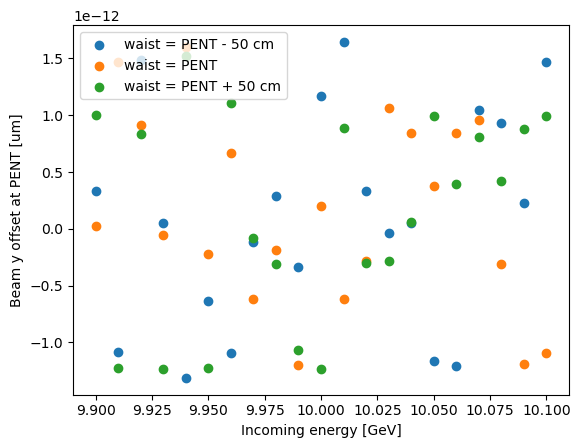

In [35]:
#Initialize tao object
tao = initializeTao(
    #inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    #numMacroParticles = 1e4,
    #csrTF = False
)

#Set lattice to the loaded config
setLattice(tao, **importedDefaultSettings)


results = {"incomingError": [], "beamOffsetUpstream": [], "beamOffsetPENT": [], "beamOffsetDownstream": []}
axis = "y"

step = 10e6
for incomingError in np.arange(9.9e9, 10.1e9 + step, step):
    #setXOffset(tao, "Q5FF", quadOffset)

    tao.cmd(f"set ele patch_sector20 e_tot_set = {incomingError}")

    setLattice(tao, **(importedDefaultSettings | allMagnetConfigs["upstream"] ))
    beamOffsetUpstream = tao.ele_orbit("PENT")[axis]

    setLattice(tao, **(importedDefaultSettings | allMagnetConfigs["PENT"] ))
    beamOffsetPENT = tao.ele_orbit("PENT")[axis]
    
    setLattice(tao, **(importedDefaultSettings | allMagnetConfigs["downstream"] ))
    beamOffsetDownstream = tao.ele_orbit("PENT")[axis]
    
    results["incomingError"].append(incomingError)
    results["beamOffsetUpstream"].append(beamOffsetUpstream)
    results["beamOffsetPENT"].append(beamOffsetPENT)
    results["beamOffsetDownstream"].append(beamOffsetDownstream)
    #print([L2PhaseSet, P["mean_energy"]])

plt.scatter(
    1e-9 * np.array(results["incomingError"]), 
    1e6 * np.array(results["beamOffsetUpstream"]),
    label = "waist = PENT - 50 cm"
)

plt.scatter(
    1e-9 * np.array(results["incomingError"]), 
    1e6 * np.array(results["beamOffsetPENT"]),
    label = "waist = PENT"
)

plt.scatter(
    1e-9 * np.array(results["incomingError"]), 
    1e6 * np.array(results["beamOffsetDownstream"]),
    label = "waist = PENT + 50 cm"
)

# Adding title and labels
plt.xlabel(f"Incoming energy [GeV]")
plt.ylabel(f'Beam {axis} offset at PENT [um]')

plt.legend(loc="upper left")

# Display the plot
plt.show()